In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pymysql
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="ravi24604",
    db="amazon"
)

In [3]:
print(conn)
cur = conn.cursor()
print(cur)
query = "select * from amazon"
cur.execute(query)
res1 = cur.fetchall()
columns = [desc[0] for desc in cur.description]
cur.close()
conn.close()

In [4]:
import pandas as pd 
df = pd.DataFrame(res1, columns=columns)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


# 1. Data Wrangling:

# Data Approach Used:

Data Wrangling:

To begin the data wrangling process, I followed these steps:

1.1 Schema Creation:

* Utilized MySQL Workbench to design the schema for the database.

* Defined the appropriate data types and constraints for each column based     on the provided data description

1.2 Data Loading with Table Data Import Wizard:

* Leveraged the Table Data Import Wizard in MySQL Workbench to seamlessly      load the sales data into the database.

* Ensured that the data was accurately imported and aligned with the schema    specifications.

1.3 Establishing Connection with PyMySQL:

* Utilized PyMySQL, a Python library, to establish a connection to the MySQL   database from within a Jupyter Notebook environment.

* Configured the connection parameters such as host, user, password, and       database name to establish a secure and reliable connection.


1.4 Verification in Jupyter Notebook:

* Executed SQL queries within the Jupyter Notebook environment to verify the   successful import of data.

* Conducted queries to retrieve sample data and performed basic data           validation checks to ensure data integrity.

1.5 Handle Null Values:

* Detect and handle null values to ensure data integrity and accuracy.

* Apply suitable methods such as imputation or removal to address missing      values.



In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# 2. Feature Engineering:
# 2.1 Adding new column named timeofday

In [6]:
df['Time'] = pd.to_datetime(df['Time'])

df['hour'] = df['Time'].dt.hour

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    else:
        return "Evening"

df['timeofday'] = df['hour'].apply(categorize_time)

df.head()

C:\Users\RAVI KANTH\AppData\Local\Temp\ipykernel_11976\2298121240.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,hour,timeofday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-05-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-05-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-05-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-05-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-05-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Morning


# 2.2 Adding a new column named dayname

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['dayname'] = df['Date'].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,hour,timeofday,dayname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-05-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Afternoon,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-05-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Morning,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-05-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Afternoon,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-05-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Evening,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-05-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Morning,Friday


# 2.3 Adding a new column named monthname

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['monthname'] = df['Date'].dt.strftime('%b')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,hour,timeofday,dayname,monthname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-05-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Afternoon,Saturday,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-05-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Morning,Friday,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-05-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Afternoon,Sunday,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-05-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Evening,Sunday,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-05-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Morning,Friday,Feb


# 3. Exploratory Data Analysis (EDA)


Summary statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date                        Time        cogs  \
count                        1000                        1000  1000.00000   
mean   2019-02-14 00:05:45.600000  2024-05-10 15:24:41.880000   307.58738   
min           2019-01-01 00:00:00         2024-05-10 10:00:00    10.17000   
25%           2019-01-24 00:00:00         2024-05-10 12:43:00   118.49750   
50%           2019-02-13 00:00:00         20

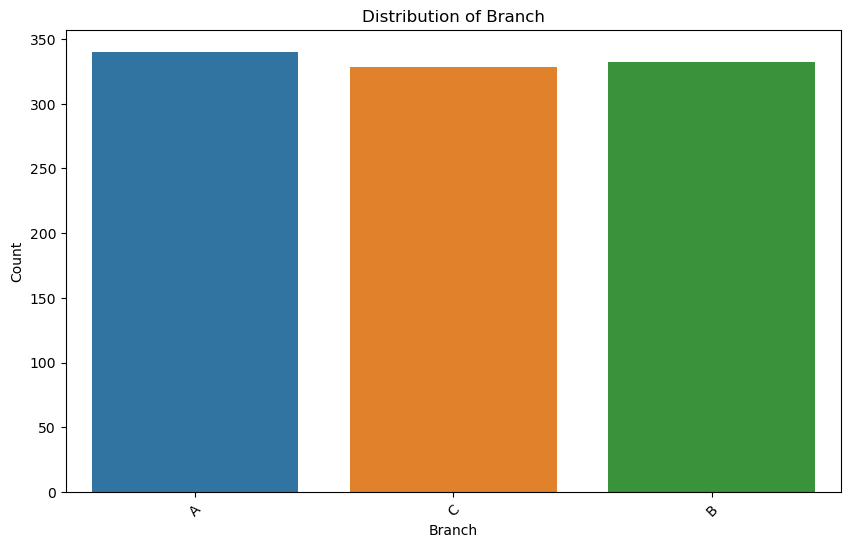

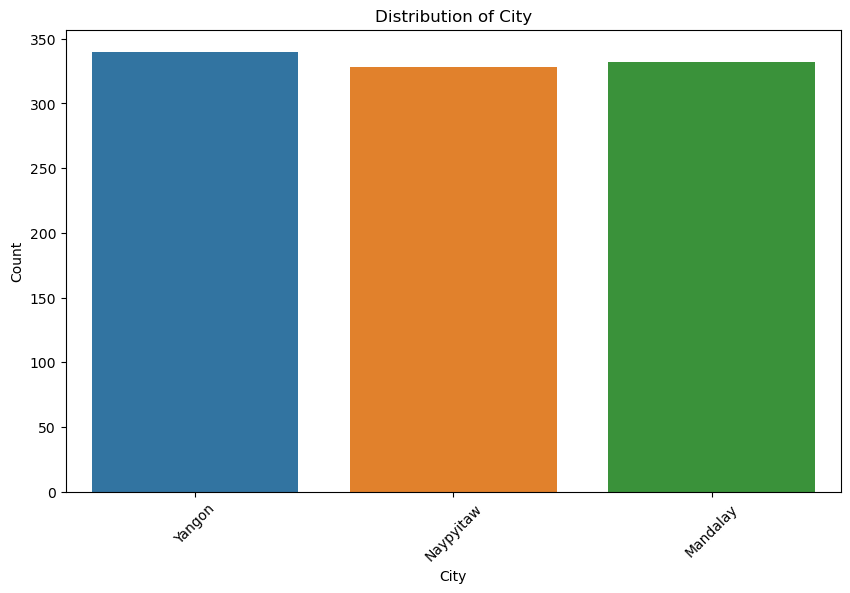

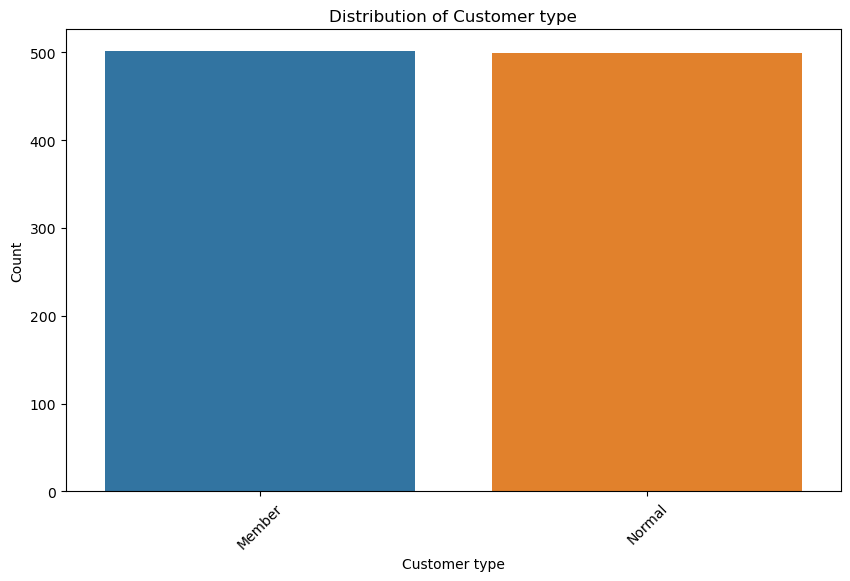

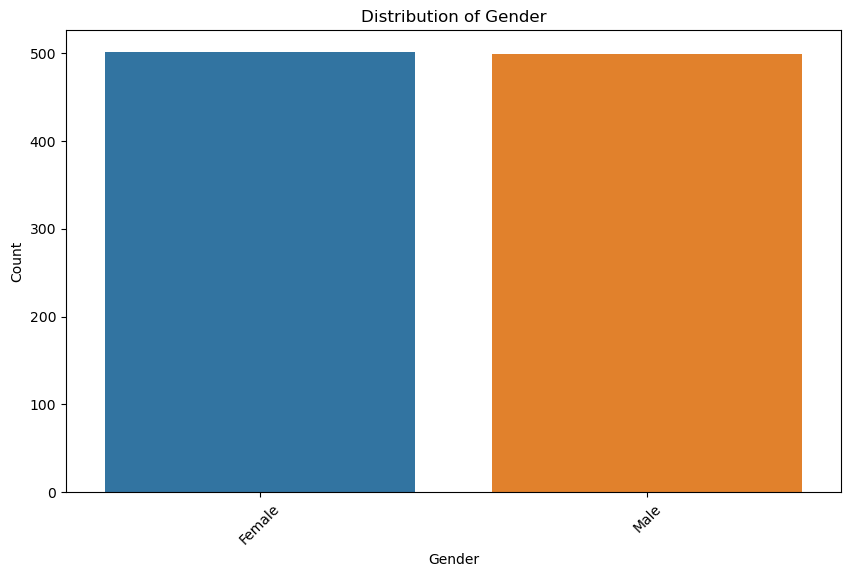

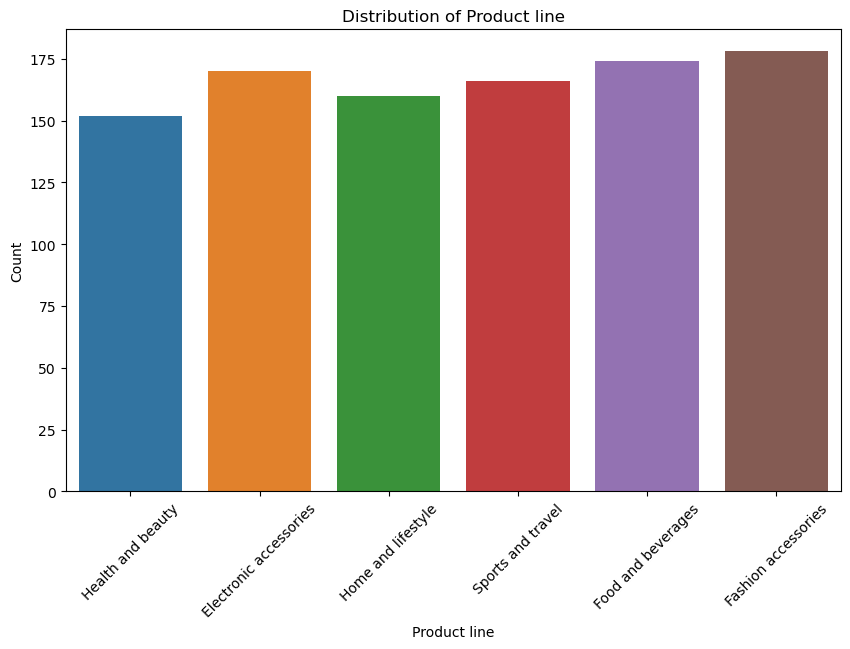

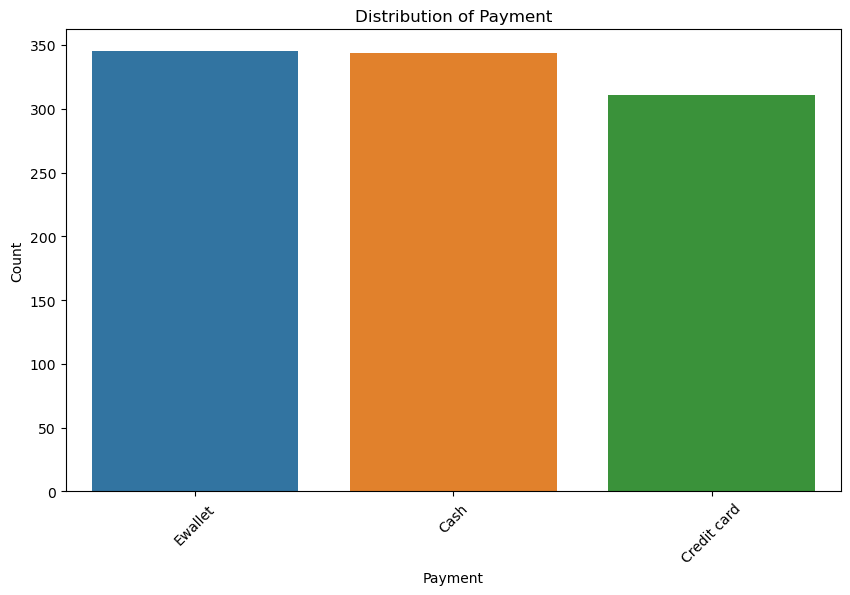

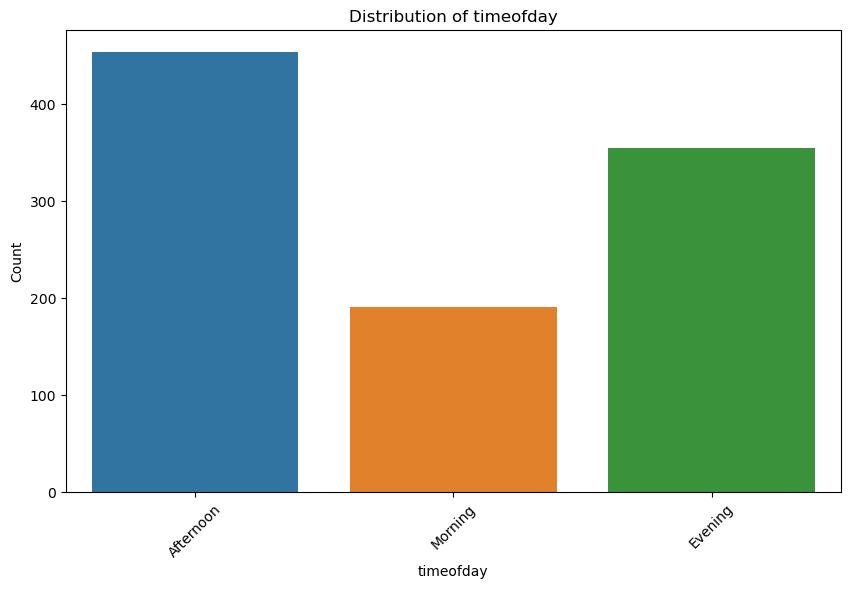

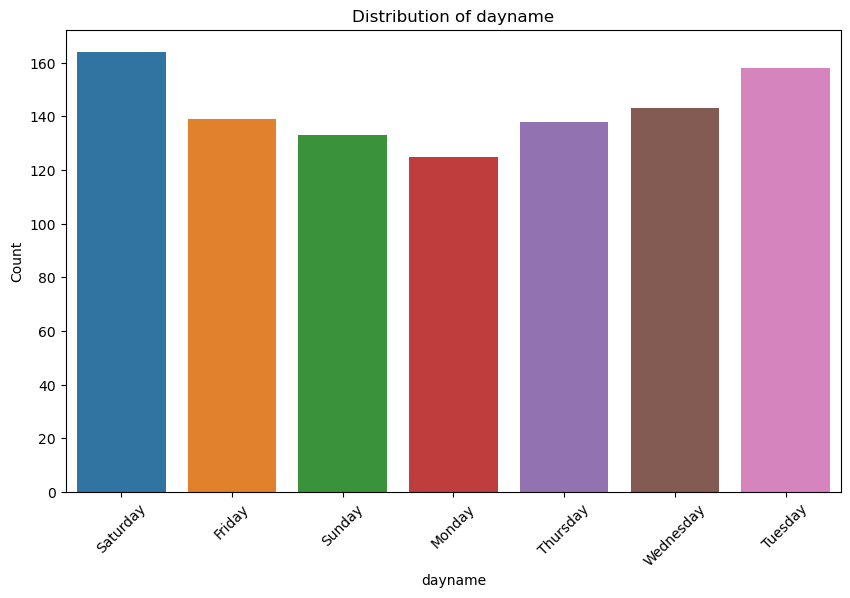

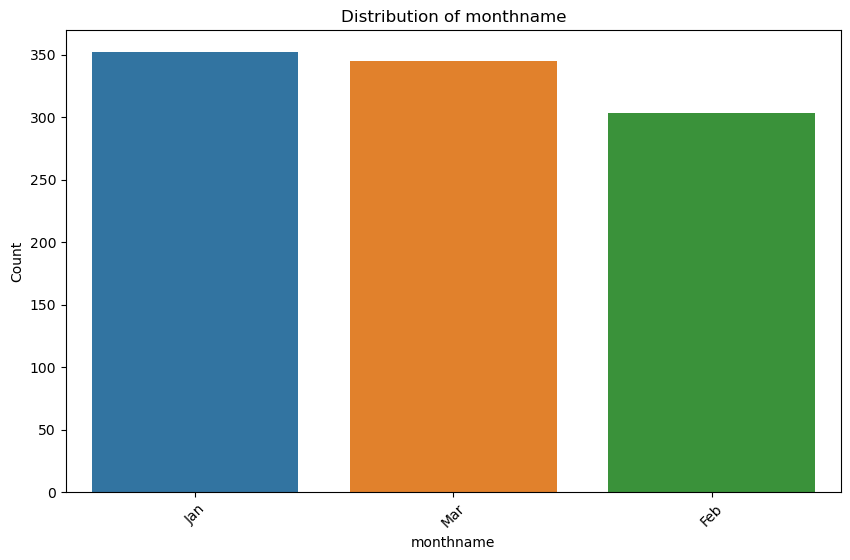

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


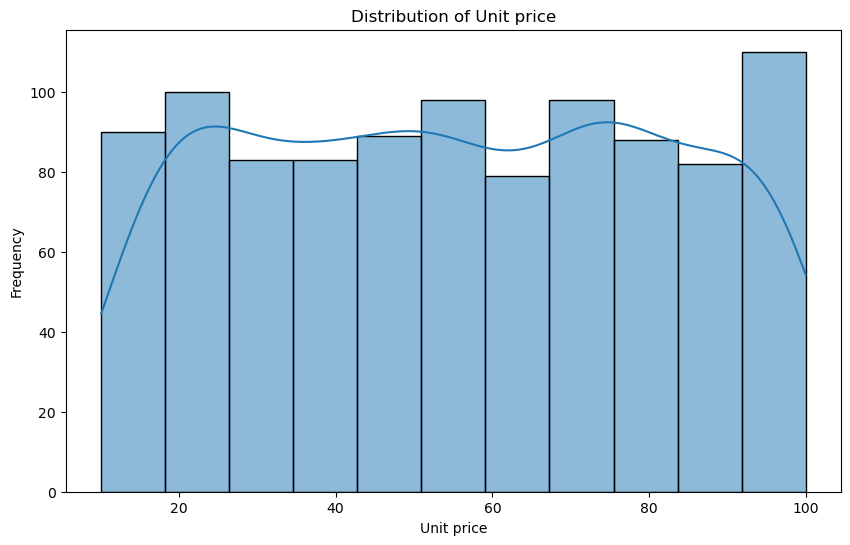

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


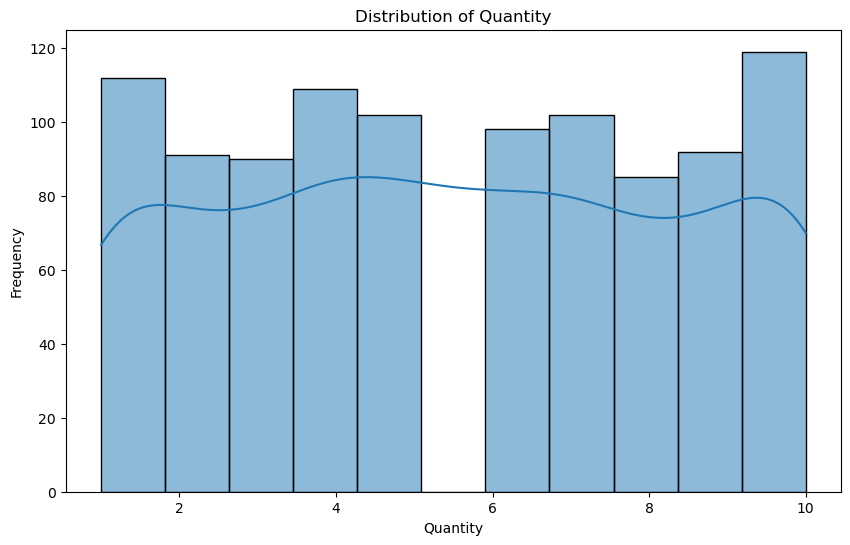

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


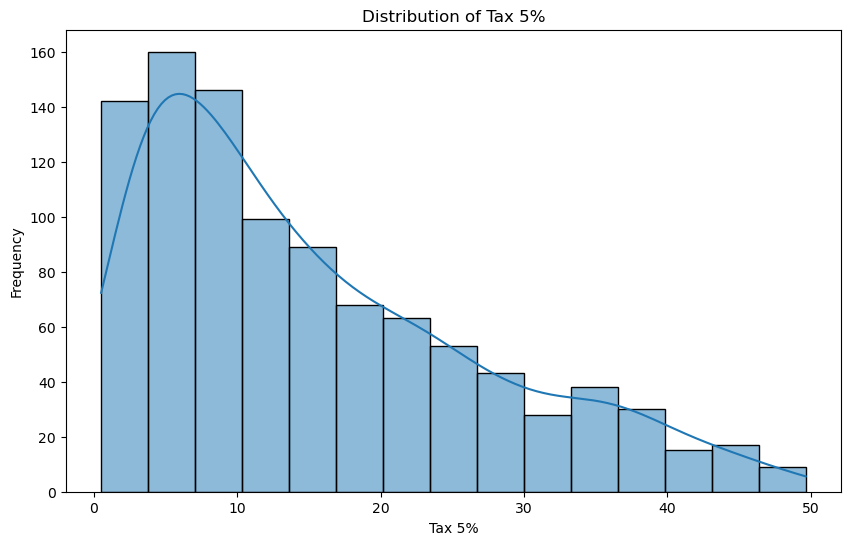

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


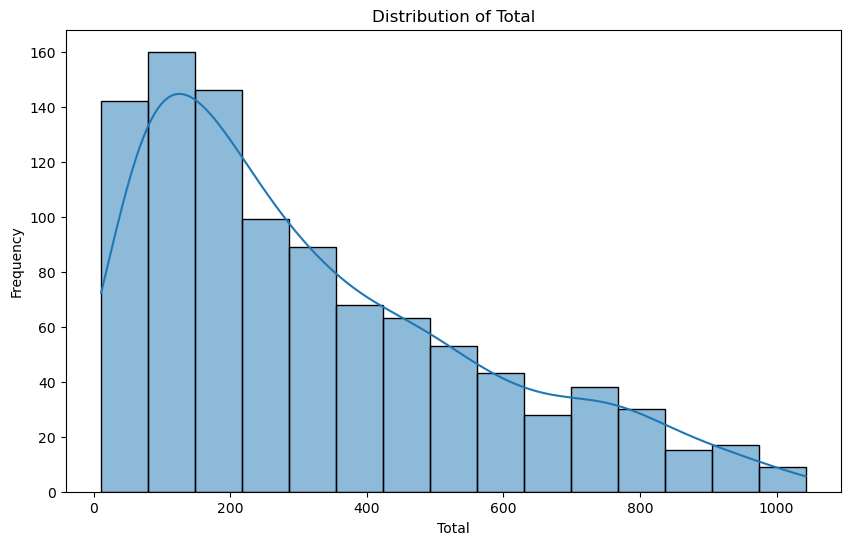

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


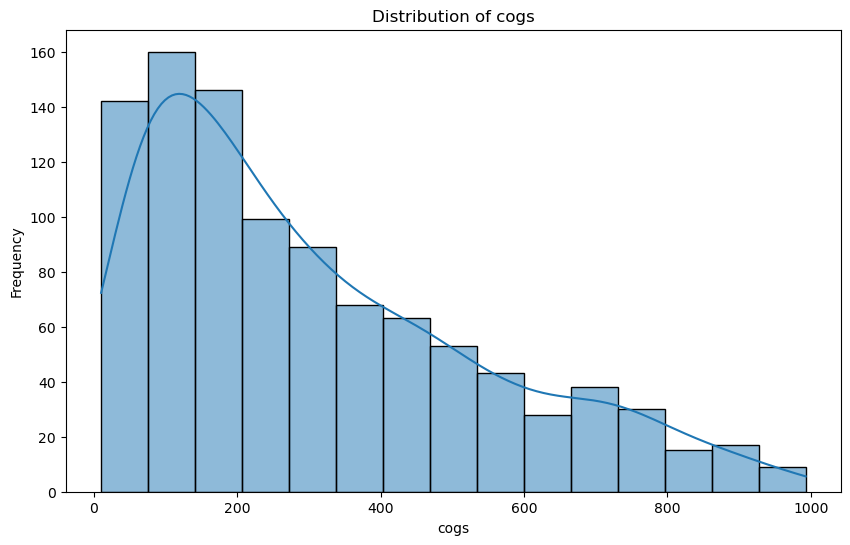

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


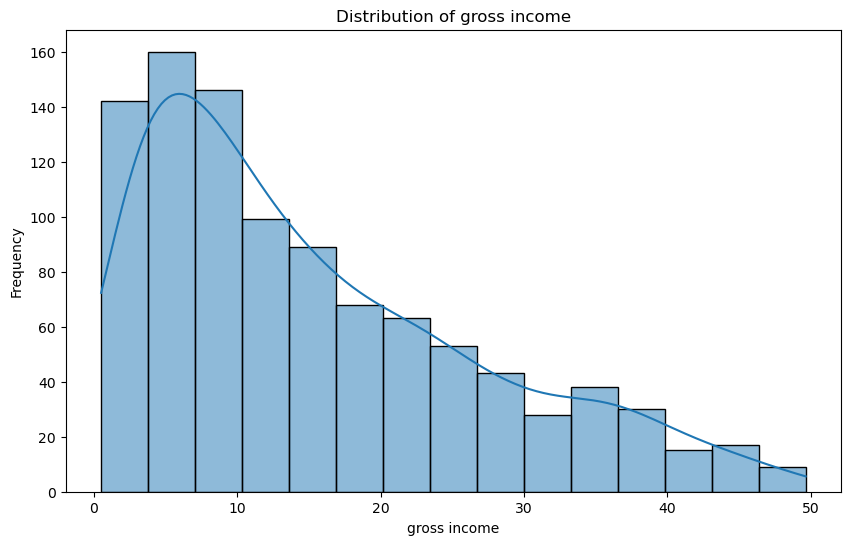

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


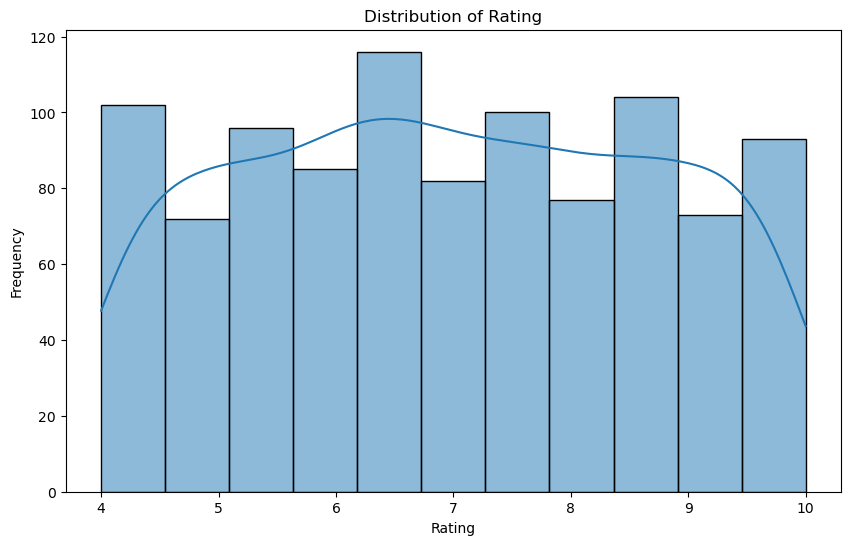

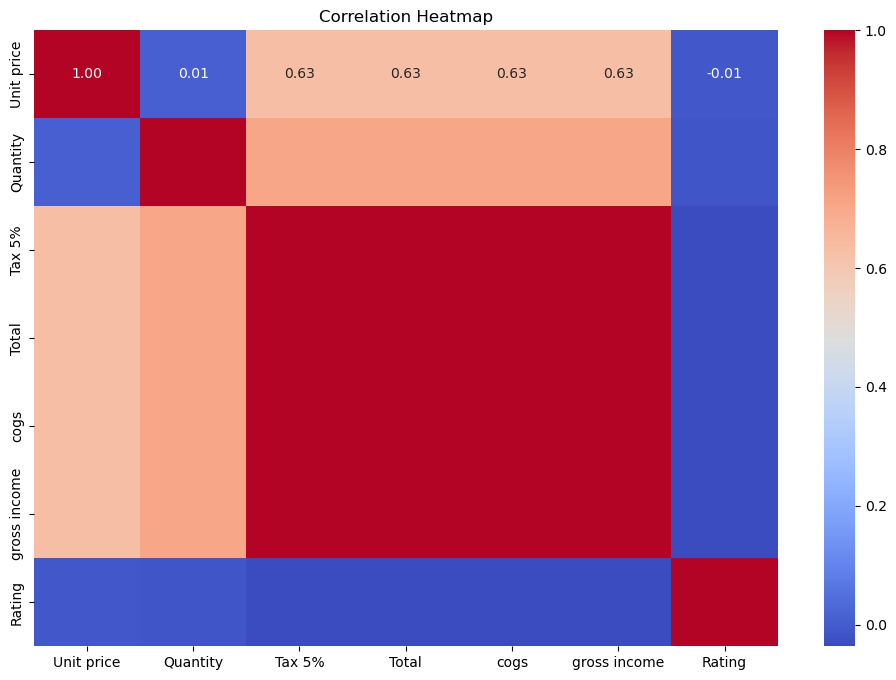

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics
print("\nSummary statistics:")
print(df.describe())


# Data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Distribution of categorical variables
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment','timeofday','dayname','monthname']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Distribution of numerical variables
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Business Questions To Answer :

1. What is the count of distinct cities in the dataset?

In [10]:
distinct_cities = df['City'].unique() 
distinct_cities_count = len(df['City'].unique())
print("Count of distinct cities:", distinct_cities_count)

Count of distinct cities: 3


2. For each branch, what is the corresponding city ?

In [11]:
branch_city_mapping = df.groupby('Branch')['City'].unique().apply(lambda x: x[0])
print("Branch-City Mapping:")
print(branch_city_mapping)

Branch-City Mapping:
Branch
A       Yangon
B     Mandalay
C    Naypyitaw
Name: City, dtype: object


3. What is the count of distinct product lines in the dataset ?

In [12]:
distinct_Product_line = df['Product line'].unique() 
print(distinct_Product_line)
distinct_Product_line_count = len(df['Product line'].unique())
print("Count of distinct Product line:", distinct_Product_line_count)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Count of distinct Product line: 6


4. Which payment method occurs most frequently ?

In [13]:
payment_counts = df['Payment'].value_counts()

# Getting the payment method with the highest count
most_frequent_payment_method = payment_counts.idxmax()
print("Most frequent payment method:", most_frequent_payment_method)

Most frequent payment method: Ewallet


5. Which product line has the highest sales ?

In [14]:
# Calculate total sales for each product line
df['Sales'] = df['Unit price'] * df['Quantity']

# Group by product line and sum the sales
product_sales = df.groupby('Product line')['Sales'].sum()

# Find the product line with the highest sales
product_line_highest_sales = product_sales.idxmax()
highest_sales_value = product_sales.max()

print("Product line with the highest sales:", product_line_highest_sales)
print("Sales value:", highest_sales_value)

Product line with the highest sales: Food and beverages
Sales value: 53471.28


6. How much revenue is generated each month?

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

revenue_per_month = df.groupby(df['Date'].dt.to_period('M')).agg({'Total': 'sum'})

# Add month names
revenue_per_month['Month'] = revenue_per_month.index.strftime('%B %Y')

print(revenue_per_month)

              Total          Month
Date                              
2019-01  116291.868   January 2019
2019-02   97219.374  February 2019
2019-03  109455.507     March 2019


7. In which month did the cost of goods sold reach its peak ?

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and find the sum of COGS for each month and COGS(Cost of Goods)
cogs_per_month = df.groupby(df['Date'].dt.to_period('M'))['cogs'].sum()
print("cogs_per_month :", cogs_per_month)

# Find the month with the maximum COGS
peak_cogs_month = cogs_per_month.idxmax().strftime('%B %Y')

print("The month in which the cost of goods sold reached its peak:", peak_cogs_month)

cogs_per_month : Date
2019-01    110754.16
2019-02     92589.88
2019-03    104243.34
Freq: M, Name: cogs, dtype: float64
The month in which the cost of goods sold reached its peak: January 2019


8. Which product line generated the highest revenue ?

In [17]:
highest_revenue_pro_line = df.groupby('Product line')['Total'].sum()
print(highest_revenue_pro_line)

highest_revenue_product_line = df.groupby('Product line')['Total'].sum().idxmax()
print("Product line that generated the highest revenue :", highest_revenue_product_line)

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64
Product line that generated the highest revenue : Food and beverages


9. In which city was the highest revenue recorded ?

In [18]:
highest_revenue_city = df.groupby('City')['Total'].sum().idxmax()
print('The city where the highest revenue was recorded :', highest_revenue_city)

The city where the highest revenue was recorded : Naypyitaw


10. Which product line incurred the highest Value Added Tax ?

In [19]:
highest_vat_product_line = df.groupby('Product line')['Tax 5%'].sum().idxmax()
print("The product line that incurred the highest Value Added Tax :", highest_vat_product_line)

The product line that incurred the highest Value Added Tax : Food and beverages


11. For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."

In [20]:
Average_sales = df['Sales'].mean()

df['Sales label'] = df['Sales'].apply(lambda x: 'Good' if x > Average_sales else 'Bad')
print(df[['Product line','Sales','Sales label']])

               Product line   Sales Sales label
0         Health and beauty  522.83        Good
1    Electronic accessories   76.40         Bad
2        Home and lifestyle  324.31        Good
3         Health and beauty  465.76        Good
4         Sports and travel  604.17        Good
..                      ...     ...         ...
995       Health and beauty   40.35         Bad
996      Home and lifestyle  973.80        Good
997      Food and beverages   31.84         Bad
998      Home and lifestyle   65.82         Bad
999     Fashion accessories  618.38        Good

[1000 rows x 3 columns]


12. Identify the branch that exceeded the average number of products sold .

In [21]:
average_quantity_sold = df['Quantity'].mean()
branches_exceeding_average = df.groupby('Branch')['Quantity'].sum() > average_quantity_sold
print("branch that exceeded the average number of products sold :")
print(branches_exceeding_average[branches_exceeding_average].index.tolist())

branch that exceeded the average number of products sold :
['A', 'B', 'C']


13. Which product line is most frequently associated with each gender ?

In [22]:
most_frequent_product_line_by_gender = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count') \
                                        .sort_values(['Gender', 'Count'], ascending=[True, False]) \
                                        .groupby('Gender').head(1)

print("Most frequently associated product line for each gender:")
print(most_frequent_product_line_by_gender[['Gender', 'Product line']])

Most frequently associated product line for each gender:
   Gender         Product line
1  Female  Fashion accessories
9    Male    Health and beauty


14. Calculate the average rating for each product line.

In [23]:
average_rating_per_product_line = df.groupby('Product line')['Rating'].mean()
print("Average rating for each product line:")
print(average_rating_per_product_line)

Average rating for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


15. Count the sales occurrences for each time of day on every weekday.

In [24]:
weekday_data = df[df['dayname'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Group by both time of day and day of the week, and count the sales occurrences
sales_occurrences_by_time_of_day = weekday_data.groupby(['timeofday', 'dayname'])['Sales'].count()

print("Sales occurrences for each time of day on every weekday:")
print(sales_occurrences_by_time_of_day)


Sales occurrences for each time of day on every weekday:
timeofday  dayname  
Afternoon  Friday       68
           Monday       64
           Thursday     61
           Tuesday      62
           Wednesday    71
Evening    Friday       42
           Monday       40
           Thursday     44
           Tuesday      60
           Wednesday    50
Morning    Friday       29
           Monday       21
           Thursday     33
           Tuesday      36
           Wednesday    22
Name: Sales, dtype: int64


16. Identify the customer type contributing the highest revenue .

In [25]:
customer_type_revenue = df.groupby('Customer type')['Total'].sum()
highest_revenue_customer_type = customer_type_revenue.idxmax()
print("customer type contributing the highest revenue :", highest_revenue_customer_type)

customer type contributing the highest revenue : Member


17. Determine the city with the highest VAT percentage .

In [26]:
city_vat_sales = df.groupby('City').agg({'Total': 'sum', 'Tax 5%': 'sum'})

# Calculate the VAT percentage for each city
city_vat_sales['VAT Percentage'] = (city_vat_sales['Tax 5%'] / city_vat_sales['Total']) * 100
print(city_vat_sales['VAT Percentage'])

# Find the city with the highest VAT percentage
city_with_highest_vat_percentage = city_vat_sales['VAT Percentage'].idxmax()

print("City with the highest VAT percentage:", city_with_highest_vat_percentage)


City
Mandalay     4.761905
Naypyitaw    4.761905
Yangon       4.761905
Name: VAT Percentage, dtype: float64
City with the highest VAT percentage: Mandalay


# Conclusion : 
* while technically all cities have the highest VAT percentage (since they're all the same), the function idxmax() will return the first city it encounters in the DataFrame, that's why it outputs Mandalay.

18. Identify the customer type with the highest VAT payments .

In [27]:
customer_type_vat_payments = df.groupby('Customer type')['Tax 5%'].sum()
customer_type_highest_vat_payments = customer_type_vat_payments.idxmax()

print("customer type with the highest VAT payments :", customer_type_highest_vat_payments)

customer type with the highest VAT payments : Member


19. What is the count of distinct customer types in the dataset ?

In [28]:
distinct_customer_type_count = df['Customer type'].nunique()
print("count of distinct customer types in the dataset :", distinct_customer_type_count)

count of distinct customer types in the dataset : 2


20. What is the count of distinct payment methods in the dataset ?

In [29]:
distinct_payment_methods_count = df['Payment'].nunique()
print("the count of distinct payment methods in the dataset :",distinct_payment_methods_count)

the count of distinct payment methods in the dataset : 3


21. Which customer type occurs most frequently ?

In [30]:
customer_type_counts = df['Customer type'].value_counts()
most_frequent_customer_type = customer_type_counts.idxmax()
print("customer type that occurs most frequently :", most_frequent_customer_type)

customer type that occurs most frequently : Member


22. Identify the customer type with the highest purchase frequency.

In [31]:
customer_type_purchase_frequency = df['Customer type'].value_counts()

# Get the customer type with the highest purchase frequency
customer_type_with_highest_purchase_frequency = customer_type_purchase_frequency.idxmax()

print("Customer type with the highest purchase frequency:", customer_type_with_highest_purchase_frequency)


Customer type with the highest purchase frequency: Member


23. Determine the predominant gender among customers.

In [32]:
gender_count = df['Gender'].value_counts()
print(gender_count)
predominant_gender = gender_count.idxmax()
print("Predominant gender among customers :", predominant_gender)

Gender
Female    501
Male      499
Name: count, dtype: int64
Predominant gender among customers : Female


24. Examine the distribution of genders within each branch.

In [33]:
gender_distribution_by_branch = df.groupby(['Branch', 'Gender']).size()

print("Distribution of genders within each branch:")
print(gender_distribution_by_branch)

Distribution of genders within each branch:
Branch  Gender
A       Female    161
        Male      179
B       Female    162
        Male      170
C       Female    178
        Male      150
dtype: int64


25. Identify the time of day when customers provide the most ratings.

In [34]:
ratings_by_time_of_day = df.groupby('timeofday')['Rating'].mean()
time_of_day_with_most_ratings = ratings_by_time_of_day.idxmax()
print("Time of day when customers provide the most ratings:", time_of_day_with_most_ratings)

Time of day when customers provide the most ratings: Afternoon


26. Determine the time of day with the highest customer ratings for each branch.

In [35]:
highest_ratings_by_branch = df.groupby(['Branch', 'timeofday'])['Rating'].mean().reset_index()
highest_ratings_by_branch = highest_ratings_by_branch.sort_values(by=['Branch', 'Rating'], ascending=[True, False])
highest_ratings_by_branch = highest_ratings_by_branch.drop_duplicates(subset='Branch', keep='first')

print("Time of day with the highest customer ratings for each branch:")
print(highest_ratings_by_branch[['Branch', 'timeofday', 'Rating']])

Time of day with the highest customer ratings for each branch:
  Branch  timeofday    Rating
0      A  Afternoon  7.093671
5      B    Morning  6.891525
7      C    Evening  7.113913


27. Identify the day of the week with the highest average ratings.

In [36]:
average_ratings_by_day = df.groupby('dayname')['Rating'].mean()

# Find the day of the week with the highest average rating
day_with_highest_average_rating = average_ratings_by_day.idxmax()
highest_average_rating = average_ratings_by_day.max()

print("Day of the week with the highest average ratings:", day_with_highest_average_rating)
print("Highest average rating on", day_with_highest_average_rating, ":", highest_average_rating)

Day of the week with the highest average ratings: Monday
Highest average rating on Monday : 7.1536


28. Determine the day of the week with the highest average ratings for each branch.

In [37]:
average_ratings_by_branch_day = df.groupby(['Branch', 'dayname'])['Rating'].mean()

# Find the day of the week with the highest average rating for each branch
day_with_highest_average_rating_by_branch = average_ratings_by_branch_day.groupby('Branch').idxmax()
highest_average_rating_by_branch = average_ratings_by_branch_day.groupby('Branch').max()

print("Day of the week with the highest average ratings for each branch:")
for branch, day in day_with_highest_average_rating_by_branch.items():
    print("Branch:", branch, "- Day with highest average rating:", day[1], "- Highest average rating:", highest_average_rating_by_branch[branch])

Day of the week with the highest average ratings for each branch:
Branch: A - Day with highest average rating: Friday - Highest average rating: 7.312
Branch: B - Day with highest average rating: Monday - Highest average rating: 7.3358974358974365
Branch: C - Day with highest average rating: Friday - Highest average rating: 7.278947368421053


# Analysis :

Certainly! Let's conduct a comprehensive analysis covering Product Analysis, Sales Analysis, and Customer Analysis, and then identify any shortcomings and propose improvements :

Product Analysis :
1. Count of Distinct Product Lines :

 There are 6 distinct product lines in the dataset.

2. Product Line Performance:

* The product line "Food and beverages" has the highest sales value, indicating its popularity among customers.

* "Sports and travel" also performs well in terms of sales.

* However, there is a need to investigate further into the performance of other product lines to identify potential areas for improvement.

3. Sales Labeling:

* We categorized each product line as "Good" or "Bad" based on sales performance compared to the average. This can provide insights into which product lines require attention for enhancement.


Sales Analysis:
1. Payment Method Analysis:

* The most frequently occurring payment method is "Ewallet."

* This insight can be utilized to optimize payment processing systems and potentially introduce incentives for using preferred payment methods.

2.  Monthly Revenue Analysis:
* Revenue generated each month is provided, allowing us to identify trends and seasonality in sales.

* The highest revenue was recorded in January 2019, indicating a potential peak season.


3. Cost of Goods Sold (COGS) Analysis:

* The highest COGS occurred in January 2019, indicating increased operational costs during that period.

* Further investigation into factors contributing to higher COGS can help in cost optimization strategies.


4. Revenue by City Analysis:

* The highest revenue was recorded in Naypyitaw.

* This insight can guide marketing and sales efforts to target high-revenue areas more effectively.

5. VAT Analysis:

* The product line "Food and beverages" incurred the highest Value Added Tax.

* Strategies to optimize VAT management for this product line can be explored.


Customer Analysis:

1. Customer Type Analysis:

* The customer type "Member" contributed the highest revenue.

* Targeted loyalty programs and incentives can be implemented to retain and attract more members.

2. Customer Gender Analysis:

* Female customers slightly outnumber male customers, indicating a balanced gender distribution.

* Marketing strategies can be tailored to cater to the preferences of each gender segment.

3. Branch Analysis:

* Branches A and B have a balanced gender distribution, while Branch C has a slightly higher proportion of female customers.

* Strategies to attract more male customers to Branch C can be explored.


4. Customer Ratings Analysis:

* Customers provide the most ratings in the afternoon.

* Branch C receives the highest customer ratings in the Evening, while Branch A performs best in the Afternoon.

# Areas for Improvement:

* Product Line Diversification: Explore opportunities to expand product offerings in underperforming product lines.

* Payment Method Optimization: Encourage the adoption of preferred payment methods through incentives and promotions.

* Cost Optimization: Investigate factors contributing to high COGS and implement cost-saving measures.

* Branch Performance Enhancement: Implement targeted strategies to enhance branch performance by addressing factors contributing to lower sales and ratings, such as optimizing product offerings, improving customer service, and tailoring marketing initiatives to the local demographics and preferences of each branch's location."


* This revised approach emphasizes a multifaceted approach to improving branch performance, focusing not only on marketing campaigns but also on broader strategies to address underlying issues and enhance overall customer experience.

* Customer Engagement: Enhance customer engagement through personalized marketing campaigns and loyalty programs.

* loyalty programs: Enhancing customer engagement involves tailoring interactions to individual preferences, fostering two-way communication, and creating value-driven experiences. Personalized marketing campaigns leverage segmentation and targeting, content personalization, and behavioral triggers to deliver relevant messaging across all channels. Loyalty programs offer rewards, exclusive benefits, and community-building initiatives to incentivize repeat purchases and foster long-term relationships. By focusing on customer engagement, brands can increase loyalty, drive revenue growth, and gain a competitive edge in the market.

* Conclusion :
* By addressing these areas for improvement and leveraging the insights gained from the analysis, Amazon can enhance its sales performance and customer satisfaction, leading to sustainable growth and success.
